In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

pd.options.display.float_format = '{:.2f}'.format
plt.rc('font', family='Malgun Gothic')

PATH = '../Downloads/customer_data.csv'

c:\users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 파일 불러오기

In [2]:
df = pd.read_csv(PATH, sep='\t')

In [3]:
df

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,1965,75579400.00,미혼,0,58,825500,114400,709800,...,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,1962,60247200.00,미혼,2,38,14300,1300,7800,...,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,1973,93096900.00,배우자 있음,0,26,553800,63700,165100,...,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,1992,34639800.00,배우자 있음,1,26,14300,5200,26000,...,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,1989,75780900.00,배우자 있음,1,94,224900,55900,153400,...,5,6,5,0,0,0,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,2021-09,1975,79589900.00,배우자 있음,1,46,921700,55900,236600,...,9,4,2,0,0,0,0,0,0,11
2236,4001,2022-09,1954,83218200.00,배우자 있음,3,56,527800,0,39000,...,8,5,7,1,0,0,0,0,0,11
2237,7270,2022-04,1989,74075300.00,이혼,0,91,1180400,62400,282100,...,2,13,1,0,0,0,1,0,0,11
2238,8235,2022-04,1964,90018500.00,배우자 있음,1,8,556400,39000,278200,...,6,10,2,0,0,0,0,0,0,11


### 데이터 탐색 및 전처리

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2240 non-null   int64  
 1   signup_ym              2240 non-null   object 
 2   birth_year             2240 non-null   int64  
 3   annual_income          2216 non-null   float64
 4   marital_status         2240 non-null   object 
 5   children               2240 non-null   int64  
 6   recency                2240 non-null   int64  
 7   amount_alcohol         2240 non-null   int64  
 8   amount_fruit           2240 non-null   int64  
 9   amount_meat            2240 non-null   int64  
 10  amount_fish            2240 non-null   int64  
 11  amount_snack           2240 non-null   int64  
 12  amount_general         2240 non-null   int64  
 13  num_purchase_web       2240 non-null   int64  
 14  num_purchase_store     2240 non-null   int64  
 15  num_

In [5]:
df['총 구매 금액'] = df[['amount_alcohol', 'amount_fruit', 'amount_meat', 'amount_fish', 'amount_snack', 'amount_general']].sum(axis=1)

In [6]:
df['총 구매 횟수'] = df[['num_purchase_web', 'num_purchase_store', 'num_purchase_discount']].sum(axis=1)

In [7]:
df.isna().sum()

ID                        0
signup_ym                 0
birth_year                0
annual_income            24
marital_status            0
children                  0
recency                   0
amount_alcohol            0
amount_fruit              0
amount_meat               0
amount_fish               0
amount_snack              0
amount_general            0
num_purchase_web          0
num_purchase_store        0
num_purchase_discount     0
promotion_1               0
promotion_2               0
promotion_3               0
promotion_4               0
promotion_5               0
promotion_6               0
revenue                   0
총 구매 금액                   0
총 구매 횟수                   0
dtype: int64

In [8]:
df = df.dropna()
df

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue,총 구매 금액,총 구매 횟수
0,5524,2020-12,1965,75579400.00,미혼,0,58,825500,114400,709800,...,3,0,0,0,0,0,1,11,2102100,15
1,2174,2022-06,1962,60247200.00,미혼,2,38,14300,1300,7800,...,2,0,0,0,0,0,0,11,35100,5
2,4141,2021-11,1973,93096900.00,배우자 있음,0,26,553800,63700,165100,...,1,0,0,0,0,0,0,11,1008800,19
3,6182,2022-05,1992,34639800.00,배우자 있음,1,26,14300,5200,26000,...,2,0,0,0,0,0,0,11,68900,8
4,5324,2022-04,1989,75780900.00,배우자 있음,1,94,224900,55900,153400,...,5,0,0,0,0,0,0,11,548600,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,2021-09,1975,79589900.00,배우자 있음,1,46,921700,55900,236600,...,2,0,0,0,0,0,0,11,1743300,15
2236,4001,2022-09,1954,83218200.00,배우자 있음,3,56,527800,0,39000,...,7,1,0,0,0,0,0,11,577200,20
2237,7270,2022-04,1989,74075300.00,이혼,0,91,1180400,62400,282100,...,1,0,0,0,1,0,0,11,1613300,16
2238,8235,2022-04,1964,90018500.00,배우자 있음,1,8,556400,39000,278200,...,2,0,0,0,0,0,0,11,1095900,18


In [9]:
df['age'] = 2023 - df['birth_year']
df

C:\Users\USER\AppData\Local\Temp\ipykernel_26988\2332281902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = 2023 - df['birth_year']


,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue,총 구매 금액,총 구매 횟수,age
0,5524,2020-12,1965,75579400.00,미혼,0,58,825500,114400,709800,...,0,0,0,0,0,1,11,2102100,15,58
1,2174,2022-06,1962,60247200.00,미혼,2,38,14300,1300,7800,...,0,0,0,0,0,0,11,35100,5,61
2,4141,2021-11,1973,93096900.00,배우자 있음,0,26,553800,63700,165100,...,0,0,0,0,0,0,11,1008800,19,50
3,6182,2022-05,1992,34639800.00,배우자 있음,1,26,14300,5200,26000,...,0,0,0,0,0,0,11,68900,8,31
4,5324,2022-04,1989,75780900.00,배우자 있음,1,94,224900,55900,153400,...,0,0,0,0,0,0,11,548600,16,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,2021-09,1975,79589900.00,배우자 있음,1,46,921700,55900,236600,...,0,0,0,0,0,0,11,1743300,15,48
2236,4001,2022-09,1954,83218200.00,배우자 있음,3,56,527800,0,39000,...,1,0,0,0,0,0,11,577200,20,69
2237,7270,2022-04,1989,74075300.00,이혼,0,91,1180400,62400,282100,...,0,0,0,1,0,0,11,1613300,16,34
2238,8235,2022-04,1964,90018500.00,배우자 있음,1,8,556400,39000,278200,...,0,0,0,0,0,0,11,1095900,18,59


In [10]:
df[['ID', 'revenue']]

,ID,revenue
0,5524,11
1,2174,11
2,4141,11
3,6182,11
4,5324,11
...,...,...
2235,10870,11
2236,4001,11
2237,7270,11
2238,8235,11


In [11]:
df['revenue'].describe()

count   2216.00
mean      11.00
std        0.00
min       11.00
25%       11.00
50%       11.00
75%       11.00
max       11.00
Name: revenue, dtype: float64

In [12]:
df = df.drop(columns=['ID', 'revenue', 'birth_year'])

In [13]:
df

,signup_ym,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,...,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,총 구매 금액,총 구매 횟수,age
0,2020-12,75579400.00,미혼,0,58,825500,114400,709800,223600,114400,...,3,0,0,0,0,0,1,2102100,15,58
1,2022-06,60247200.00,미혼,2,38,14300,1300,7800,2600,1300,...,2,0,0,0,0,0,0,35100,5,61
2,2021-11,93096900.00,배우자 있음,0,26,553800,63700,165100,144300,27300,...,1,0,0,0,0,0,0,1008800,19,50
3,2022-05,34639800.00,배우자 있음,1,26,14300,5200,26000,13000,3900,...,2,0,0,0,0,0,0,68900,8,31
4,2022-04,75780900.00,배우자 있음,1,94,224900,55900,153400,59800,35100,...,5,0,0,0,0,0,0,548600,16,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2021-09,79589900.00,배우자 있음,1,46,921700,55900,236600,54600,153400,...,2,0,0,0,0,0,0,1743300,15,48
2236,2022-09,83218200.00,배우자 있음,3,56,527800,0,39000,0,0,...,7,1,0,0,0,0,0,577200,20,69
2237,2022-04,74075300.00,이혼,0,91,1180400,62400,282100,41600,15600,...,1,0,0,0,1,0,0,1613300,16,34
2238,2022-04,90018500.00,배우자 있음,1,8,556400,39000,278200,104000,39000,...,2,0,0,0,0,0,0,1095900,18,59


<AxesSubplot:xlabel='age', ylabel='Count'>

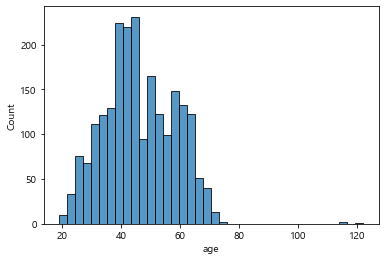

In [14]:
sns.histplot(data=df['age'])

In [15]:
df['age'].sort_values(ascending=False)

239     122
339     116
192     115
1950     75
424      74
       ... 
747      20
2213     20
1850     20
1170     19
46       19
Name: age, Length: 2216, dtype: int64

In [16]:
df = df[df['age'] < 100]

<AxesSubplot:xlabel='age', ylabel='Count'>

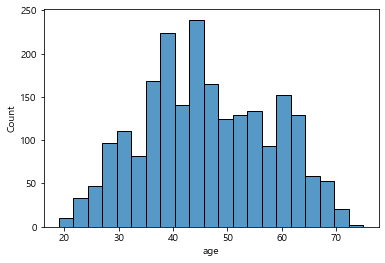

In [17]:
sns.histplot(df['age'])

In [18]:
# 데이터를 구간화
age_bins = list(range(10,81,10))
age_labels = [f'{label}대'for label in age_bins[:-1]]
print(age_bins)
print(age_labels)

[10, 20, 30, 40, 50, 60, 70, 80]
['10대', '20대', '30대', '40대', '50대', '60대', '70대']


In [19]:
#cut() 함수
# x파라미터 : 구간화할 데이터
# bins : 구간
# laebls : 구간 이름
# right : 구간의 오른쪽 값을 포함할지 안 할지
# 왼쪽값 이상, 오른쪽 값 미만으로 정했으니 포함하면 안된다
pd.cut(x=df['age'], bins=age_bins, labels=age_labels, right=False)

0       50대
1       60대
2       50대
3       30대
4       30대
       ... 
2235    40대
2236    60대
2237    30대
2238    50대
2239    60대
Name: age, Length: 2213, dtype: category
Categories (7, object): ['10대' < '20대' < '30대' < '40대' < '50대' < '60대' < '70대']

In [20]:
df['age_group'] = pd.cut(x=df['age'], bins=age_bins, labels=age_labels, right=False)
df

C:\Users\USER\AppData\Local\Temp\ipykernel_26988\1665963925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = pd.cut(x=df['age'], bins=age_bins, labels=age_labels, right=False)


,signup_ym,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,...,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,총 구매 금액,총 구매 횟수,age,age_group
0,2020-12,75579400.00,미혼,0,58,825500,114400,709800,223600,114400,...,0,0,0,0,0,1,2102100,15,58,50대
1,2022-06,60247200.00,미혼,2,38,14300,1300,7800,2600,1300,...,0,0,0,0,0,0,35100,5,61,60대
2,2021-11,93096900.00,배우자 있음,0,26,553800,63700,165100,144300,27300,...,0,0,0,0,0,0,1008800,19,50,50대
3,2022-05,34639800.00,배우자 있음,1,26,14300,5200,26000,13000,3900,...,0,0,0,0,0,0,68900,8,31,30대
4,2022-04,75780900.00,배우자 있음,1,94,224900,55900,153400,59800,35100,...,0,0,0,0,0,0,548600,16,34,30대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2021-09,79589900.00,배우자 있음,1,46,921700,55900,236600,54600,153400,...,0,0,0,0,0,0,1743300,15,48,40대
2236,2022-09,83218200.00,배우자 있음,3,56,527800,0,39000,0,0,...,1,0,0,0,0,0,577200,20,69,60대
2237,2022-04,74075300.00,이혼,0,91,1180400,62400,282100,41600,15600,...,0,0,0,1,0,0,1613300,16,34,30대
2238,2022-04,90018500.00,배우자 있음,1,8,556400,39000,278200,104000,39000,...,0,0,0,0,0,0,1095900,18,59,50대


In [21]:
df['age_group'].value_counts()

40대    678
30대    502
50대    485
60대    338
20대    185
70대     23
10대      2
Name: age_group, dtype: int64

In [22]:
age_group_replace_dict = {
    '10대' : '20대 이하',
    '20대' : '20대 이하',
    '60대' : '60대 이상',
    '70대' : '60대 이상'
}
df['age_group'] = df['age_group'].replace(age_group_replace_dict)

C:\Users\USER\AppData\Local\Temp\ipykernel_26988\846544977.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = df['age_group'].replace(age_group_replace_dict)


Text(0, 0.5, '고객 수(명)')

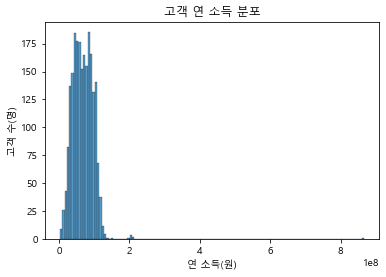

In [23]:
sns.histplot(df['annual_income'])
plt.title('고객 연 소득 분포')
plt.xlabel('연 소득(원)')
plt.ylabel('고객 수(명)')

c:\users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_income'>

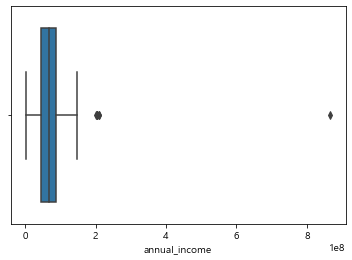

In [24]:
sns.boxplot(df['annual_income'])

In [25]:
income = df['annual_income']
q1 = income.quantile(0.25)
q3 = income.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

normal_condition = (lower_bound <= income) & (income <= upper_bound)
df = df[normal_condition]

c:\users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_income'>

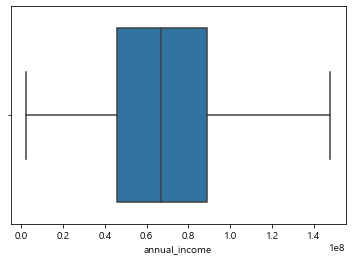

In [26]:
sns.boxplot(df['annual_income'])

In [27]:
#등급은 클수록 좋은것으로 가정
num_grades = 3

In [28]:
grade_labels = list(range(1, num_grades + 1))
grade_labels

[1, 2, 3]

In [29]:
#Recency 등급

#x는 데이터
#q는 등분해주는 수
#앞 그룹부터 3등급, 2등급, 1등급이므로 역순으로 넣어줘야한다
recency_grade = pd.qcut(x=df['recency'], q=num_grades, labels=grade_labels[::-1])

In [30]:
df['recency_grade'] = recency_grade

C:\Users\USER\AppData\Local\Temp\ipykernel_26988\1545958014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recency_grade'] = recency_grade


In [31]:
df['recency_grade'].value_counts()

3    752
1    730
2    723
Name: recency_grade, dtype: int64

<AxesSubplot:title={'center':'Recency 등급별 매출 기여도'}>

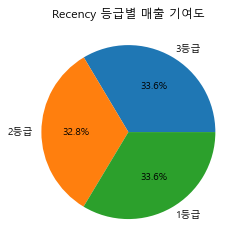

In [32]:
df.groupby('recency_grade').sum(numeric_only=True)['총 구매 금액'].plot(
    kind='pie',
    autopct='%.1f%%', #파이 차트 내 각 영역의 비중퍼센트를 소수첫째자리까지
    labels=[f'{x}등급' for x in grade_labels[::-1]],
    title = 'Recency 등급별 매출 기여도',
    ylabel=''
)

In [33]:
#Frequency
df['frequency_grade'] = pd.qcut(x=df['총 구매 횟수'], q=num_grades, labels=grade_labels)

C:\Users\USER\AppData\Local\Temp\ipykernel_26988\637064581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['frequency_grade'] = pd.qcut(x=df['총 구매 횟수'], q=num_grades, labels=grade_labels)


In [34]:
df['frequency_grade'].value_counts()

1    851
2    679
3    675
Name: frequency_grade, dtype: int64

<AxesSubplot:title={'center':'Frequency 등급별 매출 기여도'}>

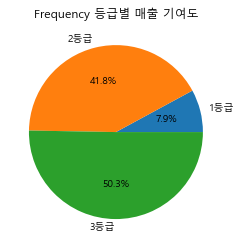

In [35]:
df.groupby('frequency_grade').sum(numeric_only=True)['총 구매 금액'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels],
    title='Frequency 등급별 매출 기여도',
    ylabel=''
)

In [36]:
#Monetary 등급
df['monetary_grade'] = pd.qcut(
    x=df['총 구매 금액'], q=num_grades, labels=grade_labels
)

C:\Users\USER\AppData\Local\Temp\ipykernel_26988\3136401856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['monetary_grade'] = pd.qcut(


In [37]:
df['monetary_grade'].value_counts()

1    735
2    735
3    735
Name: monetary_grade, dtype: int64

<AxesSubplot:title={'center':'Monetary 등급별 매출 기여도'}>

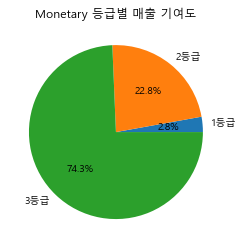

In [38]:
df.groupby('monetary_grade').sum(numeric_only=True)['총 구매 금액'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels],
    title='Monetary 등급별 매출 기여도',
    ylabel=''
)

## 가중합을 이용해 RFM 고객 세그먼트 분류하기

In [39]:
weight = {}
weight['recency'] = 1/3
weight['frequency'] = 1/3
weight['monetary'] = 1/3

In [40]:
weight

{'recency': 0.3333333333333333,
 'frequency': 0.3333333333333333,
 'monetary': 0.3333333333333333}

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   signup_ym              2205 non-null   object  
 1   annual_income          2205 non-null   float64 
 2   marital_status         2205 non-null   object  
 3   children               2205 non-null   int64   
 4   recency                2205 non-null   int64   
 5   amount_alcohol         2205 non-null   int64   
 6   amount_fruit           2205 non-null   int64   
 7   amount_meat            2205 non-null   int64   
 8   amount_fish            2205 non-null   int64   
 9   amount_snack           2205 non-null   int64   
 10  amount_general         2205 non-null   int64   
 11  num_purchase_web       2205 non-null   int64   
 12  num_purchase_store     2205 non-null   int64   
 13  num_purchase_discount  2205 non-null   int64   
 14  promotion_1            2205 non-null   i

In [42]:
df['rfm_score'] = (
    weight['recency'] * df['recency_grade'].astype('int')
    + weight['frequency'] * df['frequency_grade'].astype('int')
    + weight['monetary'] * df['monetary_grade'].astype('int')
)

C:\Users\USER\AppData\Local\Temp\ipykernel_26988\1987167518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rfm_score'] = (


- 1이상 5/3미만 : 1등급
- 5/3이상 7/3 이하 : 2등급
- 7/3초과 3이하 : 3등급

In [43]:
def rfm_segment_bins(x):
    if x < 5 / 3:
        return 1
    elif x <= 7 / 3:
        return 2
    else:
        return 3

In [45]:
df['rfm_segment'] = df['rfm_score'].apply(rfm_segment_bins)

C:\Users\USER\AppData\Local\Temp\ipykernel_26988\3259757435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rfm_segment'] = df['rfm_score'].apply(rfm_segment_bins)


In [46]:
df['rfm_segment'].value_counts()

1    926
2    811
3    468
Name: rfm_segment, dtype: int64

<AxesSubplot:title={'center':'RFM 고객 세그먼트별 매출 기여도'}>

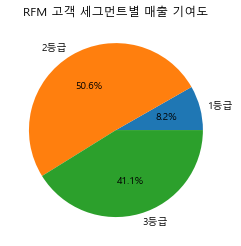

In [51]:
df.groupby('rfm_segment').sum(numeric_only=True)['총 구매 금액'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels],
    title='RFM 고객 세그먼트별 매출 기여도',
    ylabel='',
)

In [53]:
weight['recency'] = 0.2
weight['frequency'] = 0.4
weight['monetary'] = 0.4

df['rfm_score'] = (
    weight['recency'] * df['recency_grade'].astype('int')
    + weight['frequency'] * df['frequency_grade'].astype('int')
    + weight['monetary'] * df['monetary_grade'].astype('int')
)

df['rfm_segment'] = df['rfm_score'].apply(rfm_segment_bins)

C:\Users\USER\AppData\Local\Temp\ipykernel_26988\2401780976.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rfm_score'] = (
C:\Users\USER\AppData\Local\Temp\ipykernel_26988\2401780976.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rfm_segment'] = df['rfm_score'].apply(rfm_segment_bins)


In [54]:
df

,signup_ym,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,...,promotion_6,총 구매 금액,총 구매 횟수,age,age_group,recency_grade,frequency_grade,monetary_grade,rfm_score,rfm_segment
0,2020-12,75579400.00,미혼,0,58,825500,114400,709800,223600,114400,...,1,2102100,15,58,50대,2,2,3,2.40,3
1,2022-06,60247200.00,미혼,2,38,14300,1300,7800,2600,1300,...,0,35100,5,61,60대 이상,2,1,1,1.20,1
2,2021-11,93096900.00,배우자 있음,0,26,553800,63700,165100,144300,27300,...,0,1008800,19,50,50대,3,3,2,2.60,3
3,2022-05,34639800.00,배우자 있음,1,26,14300,5200,26000,13000,3900,...,0,68900,8,31,30대,3,1,1,1.40,1
4,2022-04,75780900.00,배우자 있음,1,94,224900,55900,153400,59800,35100,...,0,548600,16,34,30대,1,3,2,2.20,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2021-09,79589900.00,배우자 있음,1,46,921700,55900,236600,54600,153400,...,0,1743300,15,48,40대,2,2,3,2.40,3
2236,2022-09,83218200.00,배우자 있음,3,56,527800,0,39000,0,0,...,0,577200,20,69,60대 이상,2,3,2,2.40,3
2237,2022-04,74075300.00,이혼,0,91,1180400,62400,282100,41600,15600,...,0,1613300,16,34,30대,1,3,3,2.60,3
2238,2022-04,90018500.00,배우자 있음,1,8,556400,39000,278200,104000,39000,...,0,1095900,18,59,50대,3,3,3,3.00,3


In [56]:
df['rfm_segment'].value_counts()

1    802
3    792
2    611
Name: rfm_segment, dtype: int64

<AxesSubplot:title={'center':'RFM 고객 세그먼트별 매출 기여도'}>

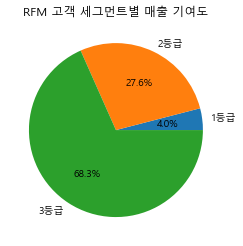

In [57]:
df.groupby('rfm_segment').sum(numeric_only=True)['총 구매 금액'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels],
    title='RFM 고객 세그먼트별 매출 기여도',
    ylabel='',
)

In [64]:
groupby_rfm_segment_age_group = df.groupby(['rfm_segment', 'age_group']).size().reset_index().rename(columns={0:'num_customers'})
groupby_rfm_segment_age_group

,rfm_segment,age_group,num_customers
0,1,20대 이하,84
1,1,30대,231
2,1,40대,268
3,1,50대,135
4,1,60대 이상,84
5,2,20대 이하,46
6,2,30대,121
7,2,40대,169
8,2,50대,161
9,2,60대 이상,114


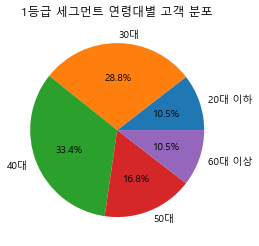

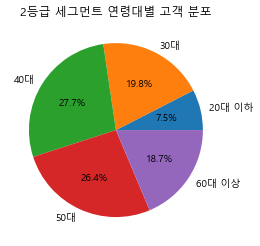

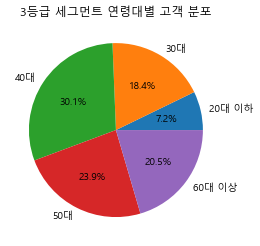

In [66]:
for i_segment in range(1, num_grades + 1):
    age_group_dist = groupby_rfm_segment_age_group[
        groupby_rfm_segment_age_group['rfm_segment'] == i_segment
    ]
    age_group_dist['num_customers'].plot(
        kind='pie',
        autopct='%.1f%%',
        labels=age_group_dist['age_group'].unique(),
        title=f'{i_segment}등급 세그먼트 연령대별 고객 분포',
        ylabel=''
    )
    plt.show()

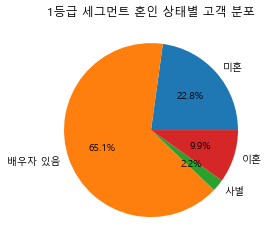

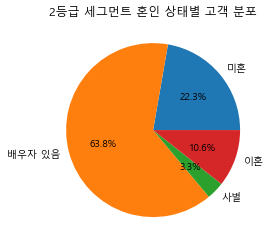

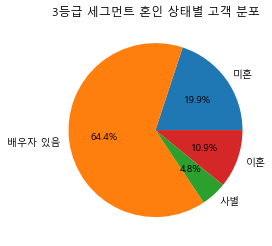

In [70]:
groupby_rfm_segment_marital = df.groupby(['rfm_segment', 'marital_status']).size().reset_index().rename(columns={0:'num_customers'})

for i_segment in range(1, num_grades + 1):
    marital_status_dist = groupby_rfm_segment_marital[groupby_rfm_segment_marital['rfm_segment'] == i_segment]
    marital_status_dist['num_customers'].plot(
        kind='pie',
        autopct='%.1f%%',
        labels=marital_status_dist['marital_status'].unique(),
        title=f'{i_segment}등급 세그먼트 혼인 상태별 고객 분포',
        ylabel=''
    )
    plt.show()

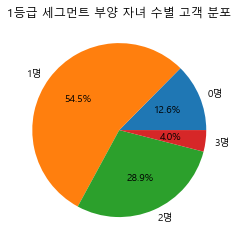

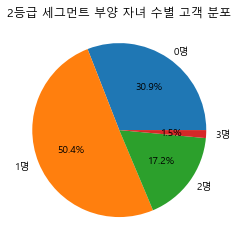

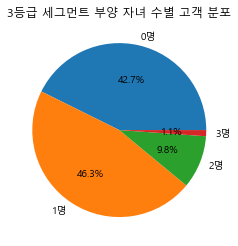

In [71]:
groupby_rfm_segment_children = df.groupby(['rfm_segment', 'children']).size().reset_index().rename(columns={0: 'num_customers'})

for i_segment in range(1, num_grades + 1):
    children_dist = groupby_rfm_segment_children[
                groupby_rfm_segment_children['rfm_segment'] == i_segment
        ]
    children_dist['num_customers'].plot(
        kind='pie',
        autopct='%.1f%%',
        labels=[f'{i}명' for i in children_dist['children'].unique()],
        title=f'{i_segment}등급 세그먼트 부양 자녀 수별 고객 분포',
        ylabel='',
    )
    plt.show()


# 세그먼트마다 품목별 매출 기여도 파악

In [73]:
groupby_rfm_segment = df.groupby('rfm_segment').sum(numeric_only=True).reset_index()
groupby_rfm_segment

,rfm_segment,annual_income,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,...,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,총 구매 금액,총 구매 횟수,age,rfm_score
0,1,34014240000.00,997,40993,26176800,4089800,16556800,6091800,4165200,13079300,...,0,2,57,5,1,60,70159700,5062,34844,996.60
1,2,43832860500.00,545,34358,231695100,22575800,133016000,31023200,22217000,39907400,...,31,6,44,48,37,78,480434500,7852,28808,1250.80
2,3,70127634200.00,550,32714,619749000,49019100,324294100,71113900,51381200,73303100,...,111,22,62,111,123,195,1188860400,14081,37989,2096.60


In [74]:
selected_columns = [
    col
    for col in groupby_rfm_segment.columns
    if col.startswith('amount_') and col != 'amount_total'
]
selected_columns.append('rfm_segment')
selected_columns

['amount_alcohol',
 'amount_fruit',
 'amount_meat',
 'amount_fish',
 'amount_snack',
 'amount_general',
 'rfm_segment']

In [79]:
amount_sum_per_product = groupby_rfm_segment[selected_columns].set_index('rfm_segment')
amount_sum_per_product

,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general
rfm_segment,,,,,,
1,26176800,4089800,16556800,6091800,4165200,13079300
2,231695100,22575800,133016000,31023200,22217000,39907400
3,619749000,49019100,324294100,71113900,51381200,73303100


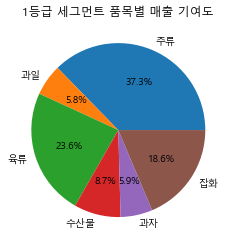

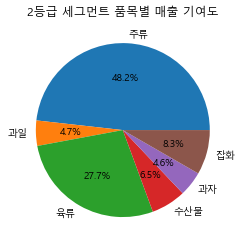

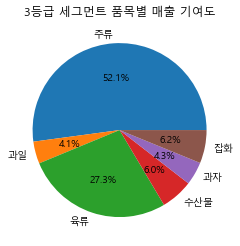

In [80]:
for i_segment in range(1, num_grades + 1):
    amount_sum_per_product.loc[i_segment].plot(
        kind='pie',
        autopct='%.1f%%',
        labels=['주류', '과일', '육류', '수산물', '과자', '잡화'],
        title=f'{i_segment}등급 세그먼트 품목별 매출 기여도',
        ylabel='',
    )
    plt.show()


## 세그먼트마다 프로모션 참여율 파악

In [83]:
groupby_rfm_segment = df.groupby(['rfm_segment']).mean(numeric_only=True).reset_index()
groupby_rfm_segment

,rfm_segment,annual_income,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,...,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,총 구매 금액,총 구매 횟수,age,rfm_score
0,1,42411770.57,1.24,51.11,32639.40,5099.50,20644.39,7595.76,5193.52,16308.35,...,0.00,0.00,0.07,0.01,0.00,0.07,87480.92,6.31,43.45,1.24
1,2,71739542.55,0.89,56.23,379206.38,36948.94,217702.13,50774.47,36361.70,65314.89,...,0.05,0.01,0.07,0.08,0.06,0.13,786308.51,12.85,47.15,2.05
2,3,88544992.68,0.69,41.31,782511.36,61892.80,409462.25,89790.28,64875.25,92554.42,...,0.14,0.03,0.08,0.14,0.16,0.25,1501086.36,17.78,47.97,2.65


In [84]:
selected_columns = [f'promotion_{i}' for i in range(1, 7)]
selected_columns.append('rfm_segment')
selected_columns

['promotion_1',
 'promotion_2',
 'promotion_3',
 'promotion_4',
 'promotion_5',
 'promotion_6',
 'rfm_segment']

In [85]:
avg_promotion = groupby_rfm_segment[selected_columns].set_index('rfm_segment')
avg_promotion

,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
rfm_segment,,,,,,
1,0.00,0.00,0.07,0.01,0.00,0.07
2,0.05,0.01,0.07,0.08,0.06,0.13
3,0.14,0.03,0.08,0.14,0.16,0.25


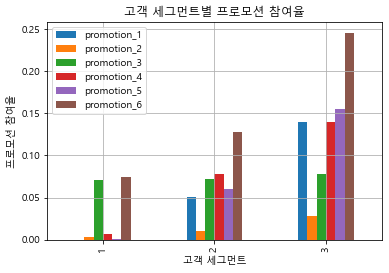

In [87]:
avg_promotion.plot(kind='bar')
plt.title('고객 세그먼트별 프로모션 참여율')
plt.xlabel('고객 세그먼트')
plt.ylabel('프로모션 참여율')
plt.grid()
# 3번 프로모션은 미슷